In [115]:
# Shopping Trends Analysis - Enhanced with Statistical Insights
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
# Load the dataset
df = pd.read_csv('shopping_trends_updated.csv')

In [119]:
# Basic Info
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [121]:
df.shape

(3900, 18)

In [123]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [125]:
df['Discount Applied'] = df['Discount Applied'].map({'Yes':1,'No':0})

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

In [129]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Discount Applied,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,0.430000,25.351538
std,1125.977353,15.207589,23.685392,0.716223,0.495139,14.447125
min,1.000000,18.000000,20.000000,2.500000,0.000000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,0.000000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,0.000000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,1.000000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,1.000000,50.000000


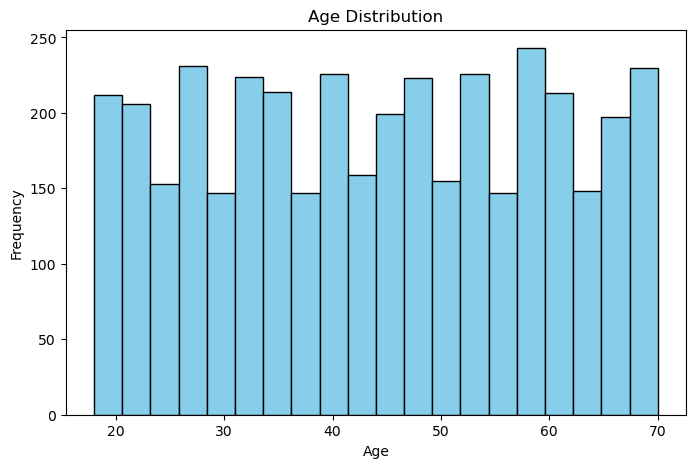

In [131]:
# Age Distribution
plt.figure(figsize=(8, 5))
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

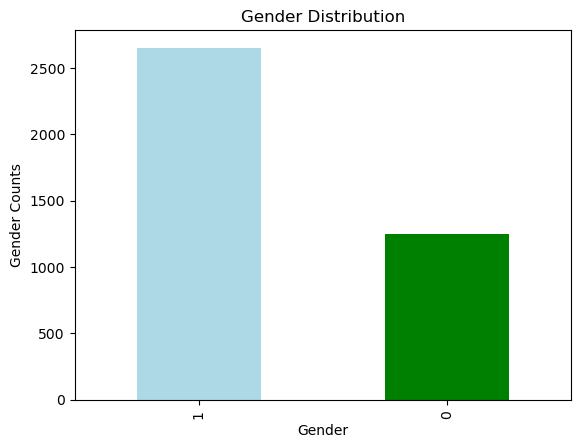

In [194]:
# Gender Distribution
color = ['#ADD8E6', 'Green']
df['Gender'].value_counts().plot(kind='bar', color=color)
plt.xlabel('Gender')
plt.ylabel('Gender Counts')
plt.title('Gender Distribution')
plt.show()

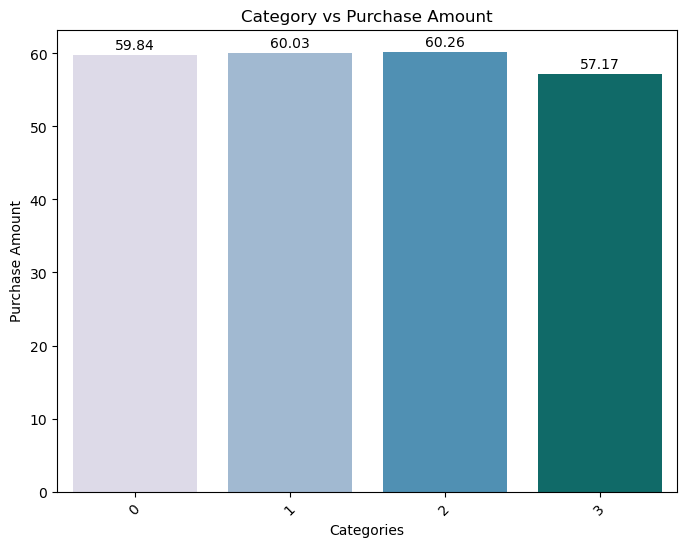

In [188]:
# Category vs Purchase Amount (Bar Plot with Annotation)
mean_purchase = df.groupby(['Category'])['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Category', y='Purchase Amount (USD)', data=mean_purchase, palette='PuBuGn')
ax.set_xlabel('Categories')
ax.set_ylabel('Purchase Amount')
ax.set_title('Category vs Purchase Amount')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=2)
plt.xticks(rotation=45)
plt.show()

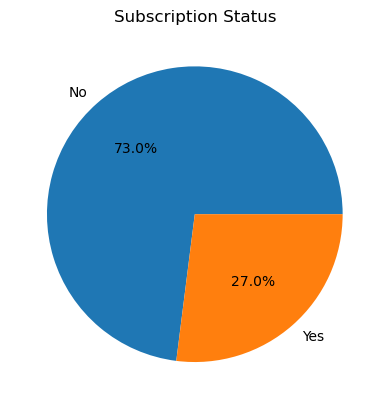

In [136]:
# Subscription Status Pie Chart
df['Subscription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Subscription Status')
plt.ylabel('')
plt.show()

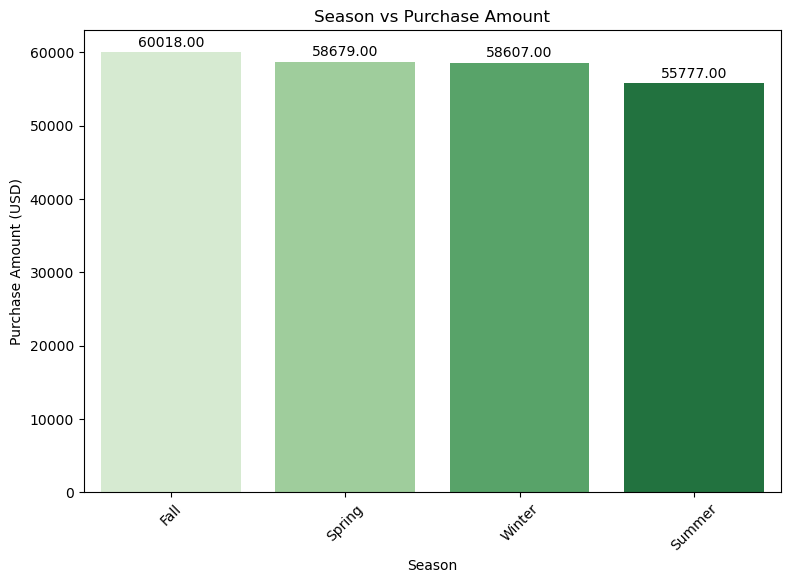

In [137]:
# Season vs Total Purchase Amount
season_purchase = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='Season', y='Purchase Amount (USD)', data=season_purchase, palette='Greens')
ax.set_title('Season vs Purchase Amount')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=2)
plt.xticks(rotation=45)
plt.show()

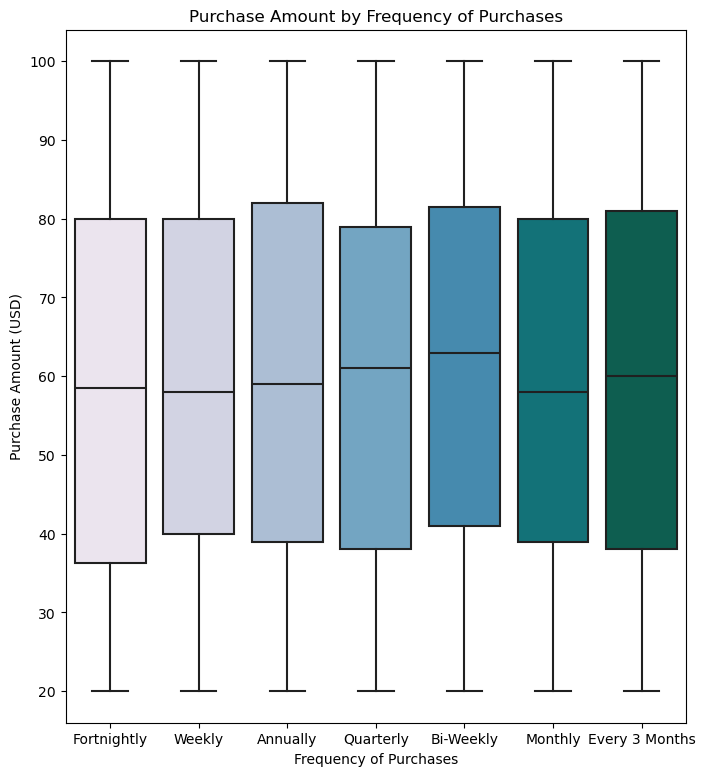

In [139]:
# Purchase Amount by Frequency of Purchases (Box Plot)
plt.figure(figsize=(8, 9))
sns.boxplot(y='Purchase Amount (USD)', x='Frequency of Purchases', data=df, palette='PuBuGn')
plt.title('Purchase Amount by Frequency of Purchases')
plt.show()

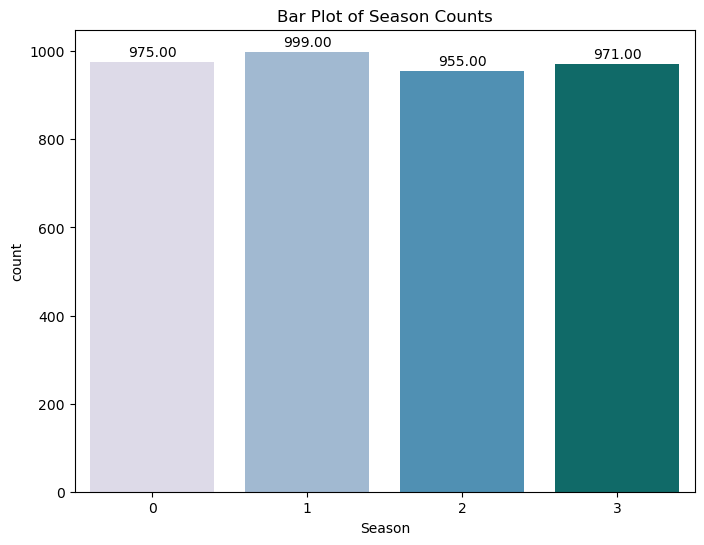

In [196]:
# Season Count Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Season', data=df, palette='PuBuGn')
plt.title('Bar Plot of Season Counts')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=2)
plt.show()

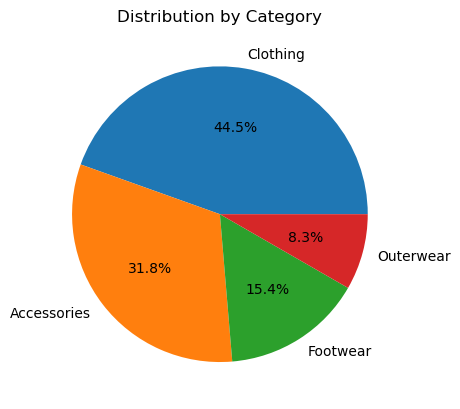

In [143]:
# Category Pie Chart
category_counts = df['Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%', labels=category_counts.index, title='Distribution by Category')
plt.ylabel('')
plt.show()

# ======================
# Statistical Analysis
# ======================

In [145]:
# 1. T-Test: Is there a significant difference in purchase amount between genders?
male_purchases = df[df['Gender'] == 'Male']['Purchase Amount (USD)']
female_purchases = df[df['Gender'] == 'Female']['Purchase Amount (USD)']
t_stat, p_val = ttest_ind(male_purchases, female_purchases)
print("\nT-Test: Purchase Amount by Gender")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


T-Test: Purchase Amount by Gender
T-statistic: -0.877, P-value: 0.381


In [146]:
# 2. ANOVA: Does season affect purchase amount?
season_groups = [group['Purchase Amount (USD)'] for name, group in df.groupby('Season')]
f_stat, p_val = f_oneway(*season_groups)
print("\nANOVA: Purchase Amount by Season")
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.3f}")


ANOVA: Purchase Amount by Season
F-statistic: 3.746, P-value: 0.011


In [148]:
# 3. Chi-Square: Is there an association between subscription status and gender?
contingency = pd.crosstab(df['Subscription Status'], df['Gender'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi-Square Test: Subscription Status vs Gender")
print(f"Chi-square: {chi2:.3f}, P-value: {p:.3f}")


Chi-Square Test: Subscription Status vs Gender
Chi-square: 676.794, P-value: 0.000


In [150]:
# 4. Correlation: Between previous purchases and purchase amount
correlation = df[['Previous Purchases', 'Purchase Amount (USD)']].corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
                       Previous Purchases  Purchase Amount (USD)
Previous Purchases               1.000000               0.008063
Purchase Amount (USD)            0.008063               1.000000


# ======================
# Basic Machine Learning Model
# ======================

In [155]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Category', 'Season', 'Payment Method', 'Subscription Status', 'Location', 'Item Purchased', 'Size', 'Frequency of Purchases', 'Color']

In [175]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [177]:
# Define features and target
X = df.drop(['Purchase Amount (USD)'], axis=1)
y = df['Purchase Amount (USD)']

In [179]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [181]:
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [185]:
print("\nMachine Learning Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Machine Learning Model Evaluation:
RMSE: 24.00
R^2 Score: -0.03


In [198]:
from xgboost import XGBRegressor

In [199]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [200]:
print("\nXGBoost Evaluation:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R^2 Score: {r2_xgb:.2f}")



XGBoost Evaluation:
RMSE: 26.34
R^2 Score: -0.24


# End of Enhanced EDA and ML